<a href="https://colab.research.google.com/github/jhhan0/self-study-ml/blob/main/notes/tensorflow-keras-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple Linear Regression Model

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

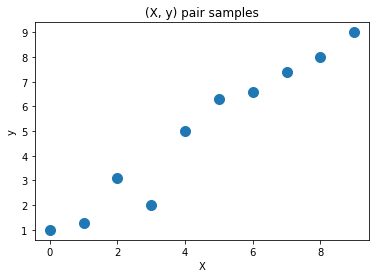

In [2]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

plt.plot(X_train, y_train, 'o', markersize=10)
plt.title("(X, y) pair samples")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Normalize the `X_train` using functions `np.mean()` and `np.std()`. Then, create a dataset.

In [3]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
train_ds = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32), tf.cast(y_train, tf.float32)))

Define a class `MyModel` which is a simple linear regression model with one `w` and one `b`.

In [4]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.w = tf.Variable(0, name='w', dtype=tf.float32) # weight
    self.b = tf.Variable(0, name='b', dtype=tf.float32) # bias
  
  def call(self, x):
    return self.w * x + self.b

In [5]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Define customized `Mean Squared Error (MSE) loss function` and `Stochastic Gradient Descent (SGD) train function` for processing model training.

In [6]:
def loss(y_true, y_pred):
  return tf.reduce_sum(tf.square(y_true - y_pred)) # mean squared error

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss(model(inputs), outputs)
  dW, db = tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Compile and train the model.

In [ ]:
tf.random.set_seed(1)
LEARNING_RATE = 0.001
BATCH_SIZE = 1
EPOCHS = 200
STEPS_PER_EPOCH = len(X_train) // BATCH_SIZE

In [7]:
train_ds = train_ds.shuffle(buffer_size=len(X_train)).repeat().batch(batch_size=BATCH_SIZE)
Ws, bs = [], []
for i, batch in enumerate(train_ds):
  if i >= STEPS_PER_EPOCH * EPOCHS:
    break
  # record weight and bias
  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  X_batch, y_batch = batch
  loss_value = loss(model(X_batch), y_batch)
  train(model, X_batch, y_batch, learning_rate=LEARNING_RATE)
  if i % 100 == 0:
    print("{:d} epochs {:4d} steps {:6.4f} loss".format(int(i // STEPS_PER_EPOCH), i, loss_value))

0 epochs    0 steps 43.5600 loss
10 epochs  100 steps 0.7530 loss
20 epochs  200 steps 20.1759 loss
30 epochs  300 steps 23.3976 loss
40 epochs  400 steps 6.3481 loss
50 epochs  500 steps 4.6356 loss
60 epochs  600 steps 0.2411 loss
70 epochs  700 steps 0.2036 loss
80 epochs  800 steps 3.8177 loss
90 epochs  900 steps 0.9416 loss
100 epochs 1000 steps 0.7035 loss
110 epochs 1100 steps 0.0348 loss
120 epochs 1200 steps 0.5404 loss
130 epochs 1300 steps 0.1170 loss
140 epochs 1400 steps 0.1195 loss
150 epochs 1500 steps 0.0944 loss
160 epochs 1600 steps 0.4670 loss
170 epochs 1700 steps 2.0695 loss
180 epochs 1800 steps 0.0020 loss
190 epochs 1900 steps 0.3612 loss


**IMPORTANT**: it is more preferred to compile and train the model using `Model.compile()` and `Model.fit()` methods from convenient Keras API. However, this is a introductory tutorial, so I used customized loss and train functions here.

In [10]:
# model.compile(
#     # SGD optimizer
#     optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
#     # MSE loss
#     loss=tf.keras.losses.MeanSquaredError(),
#     # metrics to evaluate; here Mean Absolute Error is chosen
#     metrics=['mae']
# )

In [ ]:
# train_ds = train_ds.shuffle(buffer_size=len(X_train)).repeat().batch(batch_size=BATCH_SIZE)
# model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, steps_per_epoch=STEPS_PER_EPOCH, verbose=1)

Visualize the results: `mean squared error (mse)` and `accuracy`.

In [8]:
X_test = np.linspace(0, 9, 100).reshape(-1, 1)
# normalize X_test as well using the mean and s.t.d of X_train
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

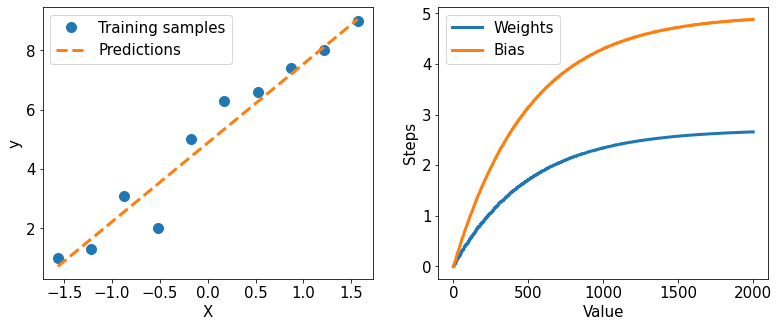

In [9]:
fig = plt.figure(figsize=(13, 5))

ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training samples', 'Predictions'], fontsize=15)
ax.set_xlabel('X', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weights', 'Bias'], fontsize=15)
ax.set_xlabel('Value', size=15)
ax.set_ylabel('Steps', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

# A Deep Neural Network (DNN) model to classify Iris Flower Dataset

In [13]:
import tensorflow_datasets as tfds

In [14]:
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/2.0.0.incompleteJZQRU2/iris-train.tfrecord*...:   0%|          | 0/15…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='/root/tensorflow_datasets/iris/2.0.0',
    file_format=tfrecord,
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=float32),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
  

Split Iris Flower Dataset into train, validation and test dataset each.

In [16]:
ds = iris['train']
ds = ds.shuffle(150, reshuffle_each_iteration=False)
train_ds = ds.take(100)
val_ds = ds.skip(100).take(20)
test_ds = ds.skip(120)

print(len(train_ds), len(val_ds), len(test_ds))

100 20 30


In [17]:
train_ds = train_ds.map(lambda x: (x['features'], x['label']))
val_ds = val_ds.map(lambda x: (x['features'], x['label']))
test_ds = test_ds.map(lambda x: (x['features'], x['label']))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Create a DNN model using `tf.keras.Sequential` with two hidden `layers.Dense` layers.

In [18]:
iris_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation='sigmoid', name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, 'softmax', name='fc2')
])
iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [19]:
iris_model.compile(
    # Adam optimizer
    optimizer=tf.keras.optimizers.Adam(),
    # SparseCategoricalCrossentropy loss function if labels are integer values
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [20]:
EPOCHS = 100
BUFFER_SIZE = len(train_ds)
BATCH_SIZE = 2
STEPS_PER_EPOCH = np.ceil(BUFFER_SIZE / BATCH_SIZE)

train_ds = train_ds.shuffle(buffer_size=BUFFER_SIZE).repeat().batch(batch_size=BATCH_SIZE).prefetch(buffer_size=1000)
val_ds = val_ds.batch(batch_size=len(val_ds))

In [21]:
history = iris_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH)

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 1.4371 - accuracy: 0.3300 - val_loss: 1.3561 - val_accuracy: 0.3000
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2350 - accuracy: 0.3300 - val_loss: 1.2062 - val_accuracy: 0.3000
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 1.1248 - accuracy: 0.3300 - val_loss: 1.1077 - val_accuracy: 0.3000
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.0468 - accuracy: 0.3500 - val_loss: 1.0328 - val_accuracy: 0.3000
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.9851 - accuracy: 0.6200 - val_loss: 0.9674 - val_accuracy: 0.4500
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.9272 - accuracy: 0.7000 - val_loss: 0.9510 - val_accuracy: 0.4500
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8858 - accuracy: 0.7000 - val_loss: 0.9155 - val_accuracy: 0.4500
Epoch 8/100
5

Visualize the results: `training loss` & `validation loss` / `training accuracy` & `validation accuracy` over the number of `epochs`.

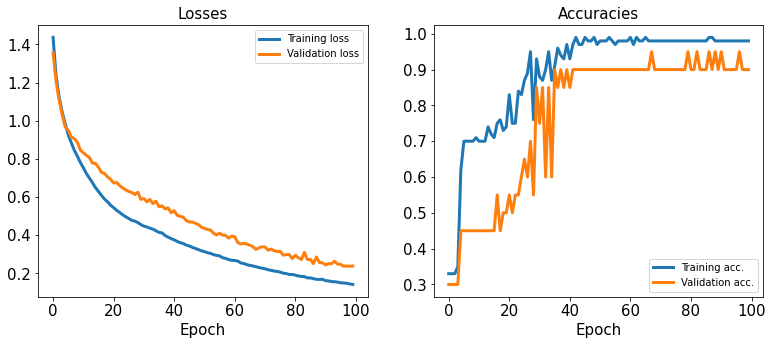

In [22]:
hist = history.history
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3, label='Training loss')
ax.plot(hist['val_loss'], lw=3, label='Validation loss')
ax.set_title('Losses', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend()
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3, label='Training acc.')
ax.plot(hist['val_accuracy'], lw=3, label='Validation acc.')
ax.set_title('Accuracies', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend()
plt.show()

Evaluate a DNN Model using a test dataset.

In [23]:
results = iris_model.evaluate(test_ds.batch(30))
print('test loss: {:.4f}, test acc.: {:.4f}'.format(results[0], results[1]))

1/1 [==============================] - 0s 39ms/step - loss: 0.1373 - accuracy: 0.9667
test loss: 0.1373, test acc.: 0.9667


Save a Model into a `h5` format for reuse.

In [24]:
iris_model.save('iris-dnn-model.h5', overwrite=True, include_optimizer=True, save_format='h5')

Load a Model and check if it outputs the same result as above.

In [25]:
iris_model_load = tf.keras.models.load_model('iris-dnn-model.h5')
results = iris_model_load.evaluate(test_ds.batch(30))
print('test loss: {:.4f}, test acc.: {:.4f}'.format(results[0], results[1]))

1/1 [==============================] - 0s 112ms/step - loss: 0.1373 - accuracy: 0.9667
test loss: 0.1373, test acc.: 0.9667
